Interval: 12 hours
------------------------------------------------------------
2025-12-29 13:20: 0 listings
2025-12-30 01:20: 19 listings
2025-12-30 13:20: 25 listings
2025-12-31 01:20: 43 listings
2025-12-31 13:20: 45 listings
2026-01-01 01:20: 54 listings
2026-01-01 13:20: 59 listings
2026-01-02 01:20: 90 listings
2026-01-02 13:20: 94 listings
2026-01-03 01:20: 112 listings
2026-01-03 13:20: 115 listings
2026-01-04 01:20: 137 listings
2026-01-04 13:20: 150 listings
2026-01-05 01:20: 165 listings
2026-01-05 13:20: 169 listings
2026-01-06 01:20: 197 listings
2026-01-06 13:20: 212 listings
2026-01-07 01:20: 229 listings
2026-01-07 13:20: 232 listings
2026-01-08 01:20: 247 listings
2026-01-08 13:20: 252 listings
2026-01-09 01:20: 279 listings
2026-01-09 13:20: 282 listings
2026-01-10 01:20: 306 listings
2026-01-10 13:20: 312 listings
2026-01-11 01:20: 335 listings
2026-01-11 13:20: 345 listings
2026-01-12 01:20: 365 listings
2026-01-12 13:20: 402 listings
2026-01-13 01:20: 432 listings


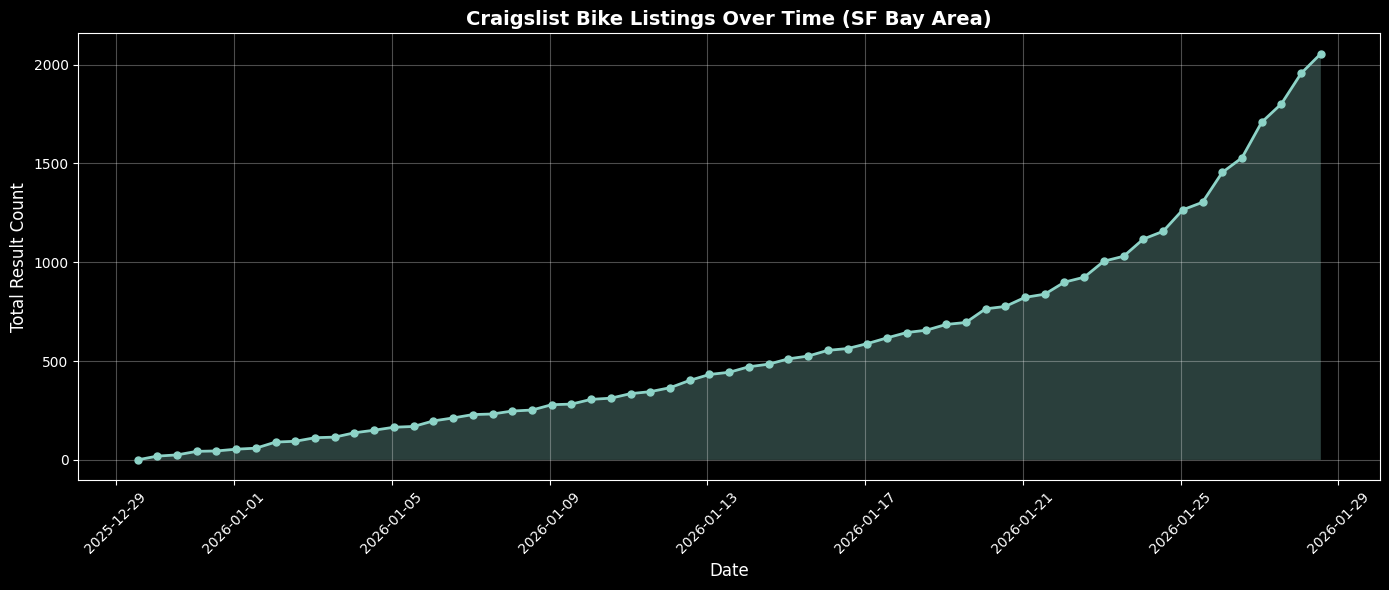


Statistics:
  Average: 582.6
  Maximum: 2055
  Minimum: 0
  Range: 2055


In [20]:
"""
Get a sense of how the `/search/full` endpoint of the internal SAPI works with timestamps
"""
import requests
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from typing import Dict, Any

# Configuration
DAYS_BACK = 30
INTERVAL_HOURS = 12

# Collect data
timestamps = []
dates = []
counts = []

now = datetime.now()
start_time = now - timedelta(days=DAYS_BACK)
current_time = start_time

print(f"Collecting data from {start_time.strftime('%Y-%m-%d')} to {now.strftime('%Y-%m-%d')}")
print(f"Interval: {INTERVAL_HOURS} hours")
print("-" * 60)


def fetch_active_listings_until(timestamp: int) -> Dict[str, Any]:
    """
    Fetch all bike listings posted until the given timestamp that still exist.
    Throws a

    :param timestamp: Unix epoch timestamp. Returns all listings posted until this time
                   that haven't expired yet (Craigslist posts expire after ~30 days),
                    so if timestamp is >= 30 days ago, there will be no active listings
    :return: dict: a JSON response containing:
        - data.items: List of compact listing arrays [id_offset, ts, cat, price, loc, hood]
        - data.decode.minPostingId: Base ID (actual posting_id = minPostingId + item[0])
        - data.totalResultCount: Total matching listings
        - data.areas: Area metadata
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:147.0) Gecko/20100101 Firefox/147.0',
        'Accept': 'application/json',
    }

    params = {
        'batch': f'1-{timestamp}-0-1-0',
        'lat': '37.789',
        'lon': '-122.394',
        'searchPath': 'san-francisco-ca/bia',
        'search_distance': '15',
        'lang': 'en',
        'cc': 'us',
    }
    response = requests.get(
        'https://sapi.craigslist.org/web/v8/postings/search/full',
        params=params,
        headers=headers,
        timeout=10
    )
    return response.json()


while current_time <= now:
    timestamp = int(current_time.timestamp())
    try:
        # fetch the active listings until the timestamp
        listings = fetch_active_listings_until(int(current_time.timestamp()))

        # log the number of posts that still exist that were posted until timestamp
        count = listings.get('data', {}).get('totalResultCount', 0)
        timestamps.append(timestamp)
        dates.append(current_time)
        counts.append(count)
        print(f"{current_time.strftime('%Y-%m-%d %H:%M')}: {count} listings")

    except Exception as e:
        print(f"{current_time.strftime('%Y-%m-%d %H:%M')}: Failed - {e}")

    current_time += timedelta(hours=INTERVAL_HOURS)
    time.sleep(0.5)  # Be polite to the API

print(f"\nCollected {len(counts)} data points")

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(dates, counts, marker='o', linewidth=2, markersize=5)
plt.fill_between(dates, counts, alpha=0.3)
plt.title('Craigslist Bike Listings Over Time (SF Bay Area)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Result Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add statistics box
avg = sum(counts) / len(counts) if counts else 0
plt.tight_layout()
plt.show()

# Print statistics
print("\nStatistics:")
print(f"  Average: {avg:.1f}")
print(f"  Maximum: {max(counts)}")
print(f"  Minimum: {min(counts)}")
print(f"  Range: {max(counts) - min(counts)}")

In [26]:
"""
Get a sense of the schema of the /search/full endpoint JSON response
"""


def print_schema(obj, indent=0):
    prefix = " " * indent
    if isinstance(obj, dict):
        for k, v in obj.items():
            print(f"{prefix}{k}: {type(v).__name__}")
            print_schema(v, indent + 4)


    elif isinstance(obj, list):
        print(f"{prefix}[list of {type(obj[0]).__name__}]" if obj else f"{prefix}[empty list]")
        if obj:
            print_schema(obj[0], indent + 4)


# get all the postings that still exist
listings = fetch_active_listings_until(int(datetime.now().timestamp()))

# look at the scema of the listings
print_schema(listings)

apiVersion: int
configId: str
configTs: int
data: dict
    areas: dict
        1: dict
            areaUnits: str
            currency: str
            distanceUnits: str
            name: str
        438: dict
            areaUnits: str
            currency: str
            distanceUnits: str
            name: str
        454: dict
            areaUnits: str
            currency: str
            distanceUnits: str
            name: str
    bundleDups: int
    cacheId: str
    cacheTs: int
    canonicalUrl: str
    categoryAbbr: str
    decode: dict
        locationDescriptions: list
            [list of int]
        locations: list
            [list of int]
        maxPostedDate: int
        minDate: int
        minPostedDate: int
        minPostingId: int
        neighborhoods: list
            [list of int]
        version: int
    detailsOrder: str
    filterButtons: list
        [list of dict]
            buttonLabel: str
            formConfig: dict
                input_prefix: 

In [31]:
"""
Get a sense of the abiliites to perform CDC (change data capture) using timestamps sent to the `/search/full` endpoint
"""
import requests
from pprint import pp
import time


def get_listings_from_past_n_minutes(n: int = 15):
    """Get NEW listings from last n minutes """

    now = int(time.time())
    n_minutes_ago = now - (n * 60)

    # Request 1: State N minutes ago
    response1 = fetch_active_listings_until(n_minutes_ago)
    old_items = response1['data']['items']
    old_ids = {item[0] for item in old_items}  # Set of posting IDs (hashable ints)

    # Request 2: Current state
    response2 = fetch_active_listings_until(now)
    new_items = response2['data']['items']

    # Find listings that are new (ID not in old set)
    truly_new_listings = [item for item in new_items if item[0] not in old_ids]

    print(f"Old count: {len(old_ids)}")
    print(f"Current count: {len(new_items)}")
    print(f"New listings: {len(truly_new_listings)}")

    return truly_new_listings


# print the new listings (if any) exist
new_listings = get_listings_from_past_n_minutes(n=15)

if not new_listings:
    print("No new listings")
else:
    print(f"Found {len(new_listings)} new listings")
for listing in new_listings:
    pp(listing)

"""
From our research, each listing has the following format:
[id_offset, timestamp_offset, category, price, location_code, neighborhood_code]
"""

Old count: 2038
Current count: 2059
New listings: 21
Found 21 new listings
[41305145, 2590259, 68, 2800, '1:1:1~37.7712~-122.4413', '0CI0lM']
[39470240, 2590191, 68, 195, '1:2~37.7725~-122.4147', '0CI0t2']
[35288554, 2590190, 68, 175, '1:2~37.7725~-122.4147', '0CI0t2']
[33202688, 2590189, 68, 150, '1:2~37.7725~-122.4147', '0CI0t2']
[34222443, 2590189, 68, 150, '1:2~37.7725~-122.4147', '0CI0t2']
[21643106, 2590188, 68, 120, '1:2~37.7725~-122.4147', '0CI0t2']
[4268185, 2590187, 68, 50, '1:2~37.7725~-122.4147', '0CI0t2']
[2732054, 2590186, 68, 240, '1:2~37.7725~-122.4147', '0CI0t2']
[40555557, 2589876, 68, 290, '2:3:2~37.6196~-122.4816', '0CI0lM']
[39447650, 2589870, 68, 840, '2:3:2~37.6196~-122.4816', '0CI0lM']
[40678018, 2589866, 68, 440, '2:3:2~37.6196~-122.4816', '0CI0lM']
[40678125, 2589859, 68, 290, '2:3:2~37.6196~-122.4816', '0CI0lM']
[40295946, 2589853, 68, 550, '2:3:2~37.6196~-122.4816', '0CI0lM']
[37391030, 2589845, 68, 2200, '2:3:2~37.6196~-122.4816', '0CI0lM']
[40678252, 25898

'\nFrom our research, each listing has the following format:\n[id_offset, timestamp_offset, category, price, location_code, neighborhood_code]\n\n'

In [35]:
"""
From our research, to get the actual post ID, we need to combine the `id_offset` with the `minPostingId` from the `search/full` endpoint's `decode` object
By adding `minPostingId + id_offset`, we can generate the post ID to auto-generate the url for each post
"""
import requests
import time
from pprint import pprint as pp


def fetch_active_listings_until(timestamp: int):
    """Fetch all bike listings posted until the given timestamp that still exist."""
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:147.0) Gecko/20100101 Firefox/147.0',
        'Accept': 'application/json',
    }

    params = {
        'batch': f'1-{timestamp}-0-1-0',
        'lat': '37.789',
        'lon': '-122.394',
        'searchPath': 'san-francisco-ca/bia',
        'search_distance': '15',
        'lang': 'en',
        'cc': 'us',
    }
    response = requests.get(
        'https://sapi.craigslist.org/web/v8/postings/search/full',
        params=params,
        headers=headers,
        timeout=10
    )
    return response.json()


def get_urls_of_new_listings(n=15):
    now = int(time.time())
    n_minutes_ago = now - (n * 60)

    # Request 1: State N minutes ago
    old_listings = fetch_active_listings_until(n_minutes_ago)
    old_items = old_listings['data']['items']
    old_ids = {item[0] for item in old_items}

    # Request 2: Current state
    curr_listings = fetch_active_listings_until(now)
    curr_items = curr_listings['data']['items']

    # Find truly new listings in past N minutes
    new_items = [item for item in curr_items if item[0] not in old_ids]

    print(f"Old listing count: {len(old_ids)}")
    print(f"Current listing count: {len(curr_items)}")
    print(f"New listings in past {n} minutes: {len(new_items)}")  #

    # Decode the listings
    min_posting_id = curr_listings['data']['decode']['minPostingId']
    sf_bikes_url_base = "https://sfbay.craigslist.org/bik/"

    return [
        f"{sf_bikes_url_base}{min_posting_id + item[0]}.html" for item in new_items
    ]


# fetch the new listings
new_listing_urls = get_urls_of_new_listings()

# retrieve the URL for each new listing and print
if not new_listing_urls:
    print("No new listings")
else:
    print(f"\nFound {len(new_listing_urls)} new listings:")
    for listing in new_listing_urls:
        pp(listing)

Old listing count: 2054
Current listing count: 2060
New listings in past 15 minutes: 6

Found 6 new listings:
'https://sfbay.craigslist.org/bik/7885868952.html'
'https://sfbay.craigslist.org/bik/7894826663.html'
'https://sfbay.craigslist.org/bik/7894825872.html'
'https://sfbay.craigslist.org/bik/7909038605.html'
'https://sfbay.craigslist.org/bik/7910026316.html'
'https://sfbay.craigslist.org/bik/7908631664.html'
